In [49]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [24]:
# load data from .csv file and create a dataframe

df = pd.read_csv("booking_reviews.csv")
df

,index,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,0,Exceptional,11-Jul-21,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,1,I highly recommend this b&b! We enjoyed it a lot!,24-Nov-19,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,2,Exceptional,03-Jan-20,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."
3,3,My stay in the house was a experiencing bliss ...,08-Sep-19,Kannan,NaN,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
4,4,One bedroom apartment with wonderful view and ...,23-Jun-19,Sue,https://cf.bstatic.com/xdata/images/xphoto/squ...,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26670,26670,Good stay,03-Jul-19,Dragos,NaN,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/euro-...,Hotel Euro Capital Brussels,https://www.booking.com/hotel/be/euro-capital-...,7.7,Romania,8.8,"Had a room with the view to the main street, j...","<p class=""review_neg ""><svg aria-label=""Negati...",Business trip~Solo traveller~Double or Twin Ro...,"{'language': 'en-gb', 'source': 'https://www.b..."
26671,26671,Exceptional,07-Dec-18,Anonymous,NaN,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/glamp...,Glamping op het Zeugekot,https://www.booking.com/hotel/be/glamping-op-h...,8.6,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...","<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Family with young children~Tent~S...,"{'language': 'en-gb', 'source': 'https://www.b..."
26672,26672,Good,15-Sep-18,Zhl,NaN,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/carre...,NH Brussels Carrefour de L’Europe,https://www.booking.com/hotel/be/carrefour.en-...,7.8,Malaysia,7.9,Poor internet connection and aircon in room no...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Standard Double or Twin Ro...,"{'language': 'en-gb', 'source': 'https://www.b..."
26673,26673,Very good,02-Aug-19,Bruno,NaN,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/bilde...,Hotel Bilderdijk,https://www.booking.com/hotel/be/bilderdijk.en...,9.0,Belgium,8.3,There are no comments available for this review,"<p class=""review_none""><em>There are no commen...",Leisure trip~Couple~Basic Double

### Exploaratory Data Analysis (EDA)

In [25]:
df.describe()

,index,avg_rating,rating
count,26675.000000,26386.000000,26386.000000
mean,13337.000000,8.449242,8.560669
std,7700.553552,0.716427,1.566554
min,0.000000,3.800000,1.000000
25%,6668.500000,8.100000,7.900000
50%,13337.000000,8.500000,9.000000
75%,20005.500000,8.900000,10.000000
max,26674.000000,10.000000,10.000000


In [26]:
# checking null values for each column

null_count = df.isnull().sum()
null_count

index                  0
review_title           1
reviewed_at          105
reviewed_by          105
images             25737
crawled_at           289
url                  289
hotel_name           289
hotel_url            289
avg_rating           289
nationality          305
rating               289
review_text          289
raw_review_text      473
tags                 473
meta                 473
dtype: int64

##### fixing null values

In [27]:
df["avg_rating"] = df["avg_rating"].interpolate(method='linear', axis=0)
df["rating"] = df["rating"].interpolate(method='linear', axis=0)

In [28]:
# removing unnecessary columns

df = df.drop(columns="images")
df = df.drop(columns="raw_review_text")
df = df.drop(columns="index")

df

print(len(df))

26675


In [29]:
# checking for duplicate values

df.duplicated().sum()

0

creating function that perform analysis on review and return the results

In [30]:
# function which is used to insert text/review and get its sentiment category

def analyze_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    
    # Get the sentiment polarity (-1 to 1) and subjectivity (0 to 1)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    
    # Determine sentiment category based on polarity
    if sentiment_polarity > 0:
        sentiment_category = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_category = 'Negative'
    else:
        sentiment_category = 'Neutral'
    
    # Return the results
    return {
        'text': text,
        'sentiment_polarity': sentiment_polarity,
        'sentiment_subjectivity': sentiment_subjectivity,
        'sentiment_category': sentiment_category
    }


testing the function

In [31]:
# testing the function

text_to_analyze_test = "He is a nice man"
result_test = analyze_sentiment(text_to_analyze_test)

# Print the results
print(f"Text: {result_test['text']}")
print(f"Sentiment Polarity: {result_test['sentiment_polarity']}")
print(f"Sentiment Subjectivity: {result_test['sentiment_subjectivity']}")
print(f"Sentiment Category: {result_test['sentiment_category']}"+"\n")

Text: He is a nice man
Sentiment Polarity: 0.6
Sentiment Subjectivity: 1.0
Sentiment Category: Positive



In [32]:
sentiment_list = list()


for review in df["review_text"]:
    text_to_analyze = str(review)
    result = analyze_sentiment(text_to_analyze)
    sentiment_list.append(result["sentiment_category"])
    

In [33]:
data = {"sentiment": sentiment_list}
df_temp = pd.DataFrame(data)
df_temp

,sentiment
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
26670,Positive
26671,Positive
26672,Positive
26673,Positive


In [34]:
df["sentiment"] = df_temp["sentiment"]
df

,review_title,reviewed_at,reviewed_by,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,tags,meta,sentiment
0,Exceptional,11-Jul-21,Kyrylo,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b...",Positive
1,I highly recommend this b&b! We enjoyed it a lot!,24-Nov-19,Dimitri,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b...",Positive
2,Exceptional,03-Jan-20,Virginia,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b...",Positive
3,My stay in the house was a experiencing bliss ...,08-Sep-19,Kannan,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b...",Positive
4,One bedroom apartment with wonderful view and ...,23-Jun-19,Sue,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b...",Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26670,Good stay,03-Jul-19,Dragos,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/euro-...,Hotel Euro Capital Brussels,https://www.booking.com/hotel/be/euro-capital-...,7.7,Romania,8.8,"Had a room with the view to the main street, j...",Business trip~Solo traveller~Double or Twin Ro...,"{'language': 'en-gb', 'source': 'https://www.b...",Positive
26671,Exceptional,07-Dec-18,Anonymous,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/glamp...,Glamping op het Zeugekot,https://www.booking.com/hotel/be/glamping-op-h...,8.6,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...",Leisure trip~Family with young children~Tent~S...,"{'language': 'en-gb', 'source': 'https://www.b...",Positive
26672,Good,15-Sep-18,Zhl,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/carre...,NH Brussels Carrefour de L’Europe,https://www.booking.com/hotel/be/carrefour.en-...,7.8,Malaysia,7.9,Poor internet connection and aircon in room no...,Leisure trip~Couple~Standard Double or Twin Ro...,"{'language': 'en-gb', 'source': 'https://www.b...",Positive
26673,Very good,02-Aug-19,Bruno,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/bilde...,Hotel Bilderdijk,https://www.booking.com/hotel/be/bilderdijk.en...,9.0,Belgium,8.3,There are no comments available for this review,Leisure trip~Couple~Basic Double Room~Stayed 1...,"{'language': 'en-gb', 'source': 'https://www.b...",Positive


In [35]:
# droping the rows that has null values, its here because its causing problem if its done somewere else
df = df.dropna(axis=0)

In [36]:
# exporting data for visualization
df.to_csv("booking_reviews_cleaned.csv")

In [37]:
# total number of reviews after cleaning the data
print(df["review_title"].count())

# sentiment analysis summary
grouped_df = df.groupby("sentiment")

summary = grouped_df["sentiment"].agg("count")
summary

26185


sentiment
Negative     1505
Neutral      1379
Positive    23301
Name: sentiment, dtype: int64

In [ ]:
df2 = pd.read_csv("booking_reviews_cleaned.csv")
df2 = df2.drop(columns="Unnamed: 0")
df2

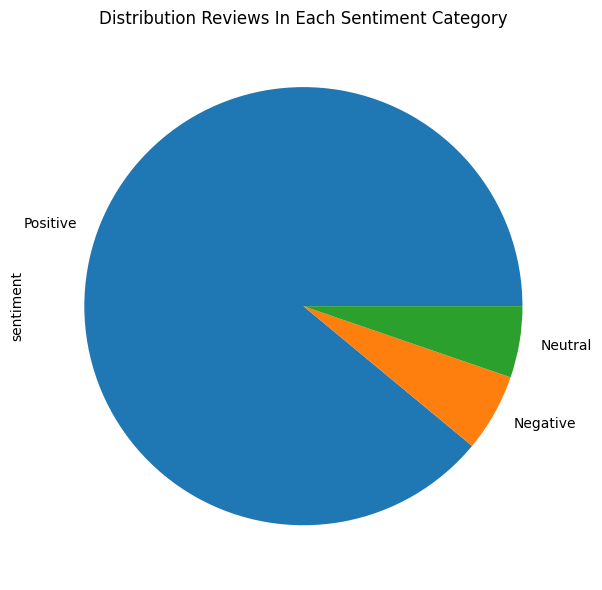

In [4]:
plt.figure(figsize=(12, 6))
df2['sentiment'].value_counts().plot(kind='pie')
plt.title("Distribution Reviews In Each Sentiment Category")
plt.tight_layout()

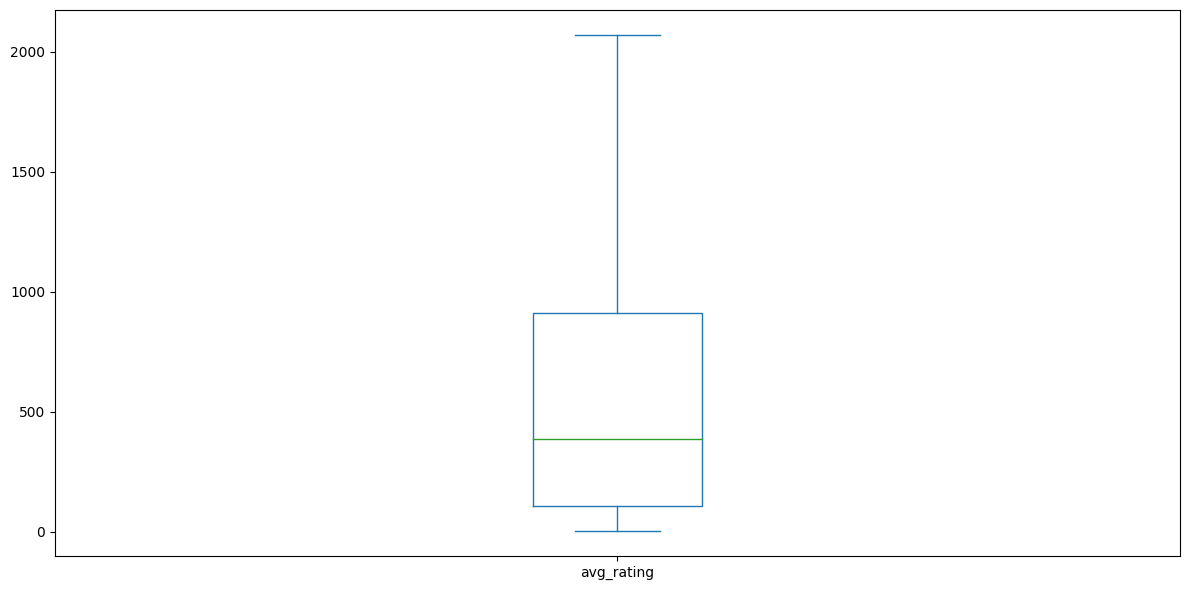

In [5]:
# checking avg_rating for outliars
plt.figure(figsize=(12, 6))
df2["avg_rating"].value_counts().plot(kind='box')
plt.tight_layout()

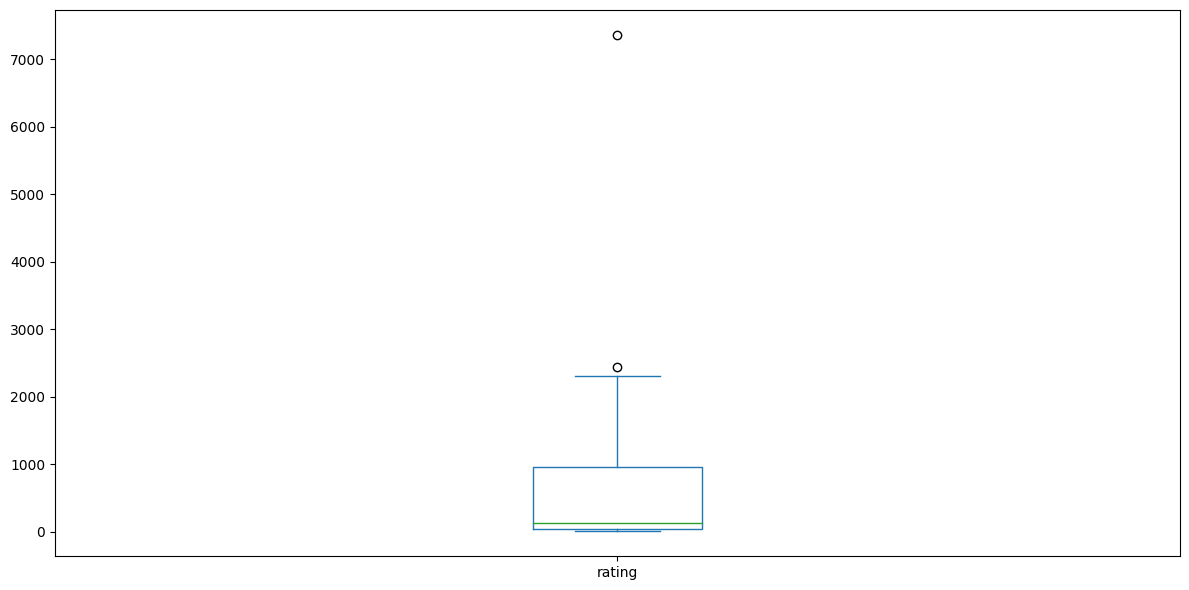

In [6]:
# checking rating for outliars
plt.figure(figsize=(12, 6))
df2["rating"].value_counts().plot(kind='box')
plt.tight_layout()

overall average rating of the hotels: 8.448336834065305


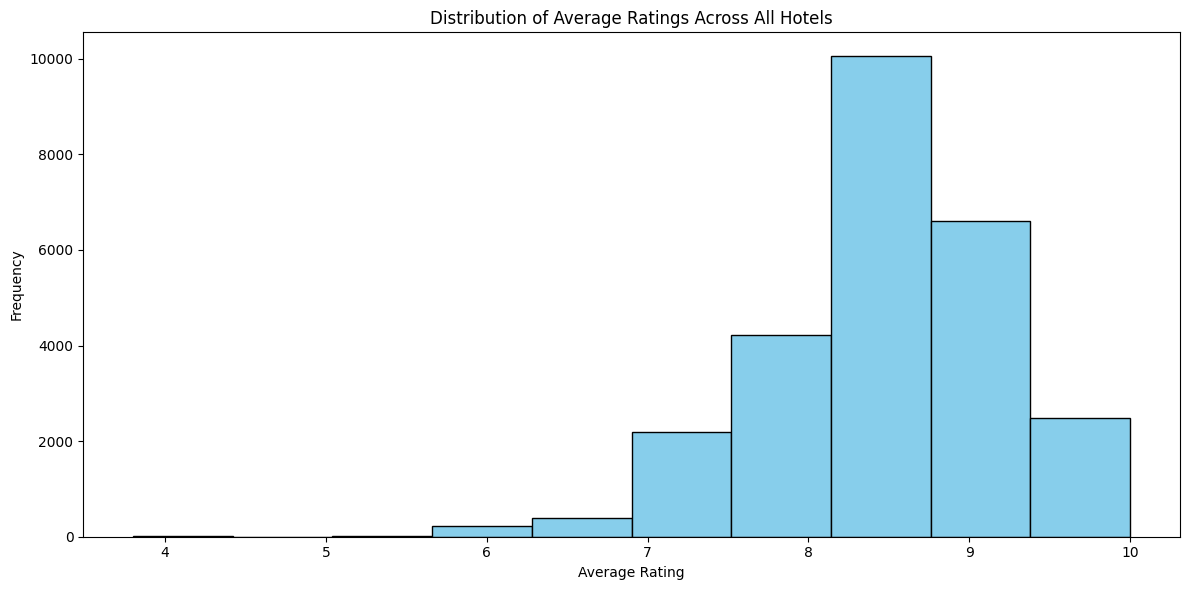

In [7]:
print(f'overall average rating of the hotels: {df2["avg_rating"].mean()}')

plt.figure(figsize=(12, 6))
plt.hist(df2['avg_rating'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of Average Ratings Across All Hotels')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

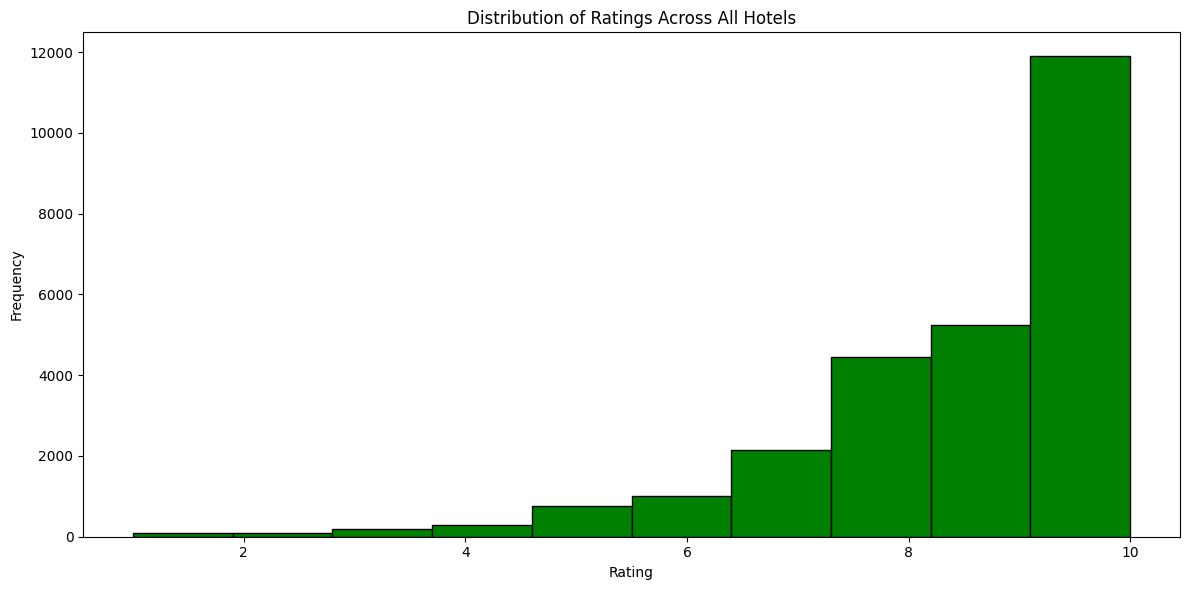

In [8]:
plt.figure(figsize= (12,6))
plt.hist(df2['rating'], bins=10, edgecolor='black', color='green')
plt.title('Distribution of Ratings Across All Hotels')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

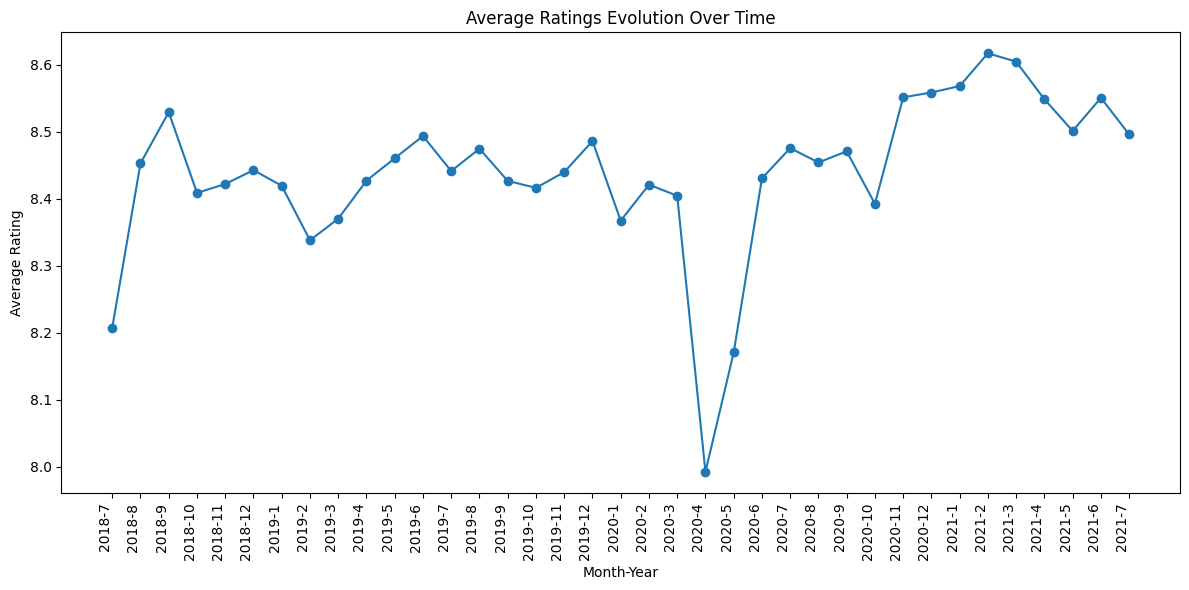

In [9]:
df2['reviewed_at'] = pd.to_datetime(df2['reviewed_at'])

# Extract month and year from the 'reviewed_at' column
df2['review_month'] = df2['reviewed_at'].dt.month
df2['review_year'] = df2['reviewed_at'].dt.year

# Group by month and year to calculate average ratings
monthly_avg_ratings = df2.groupby(['review_year', 'review_month'])['avg_rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_ratings['review_year'].astype(str) + '-' + monthly_avg_ratings['review_month'].astype(str), 
         monthly_avg_ratings['avg_rating'], marker='o', linestyle='-')

plt.title('Average Ratings Evolution Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average Rating')

plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

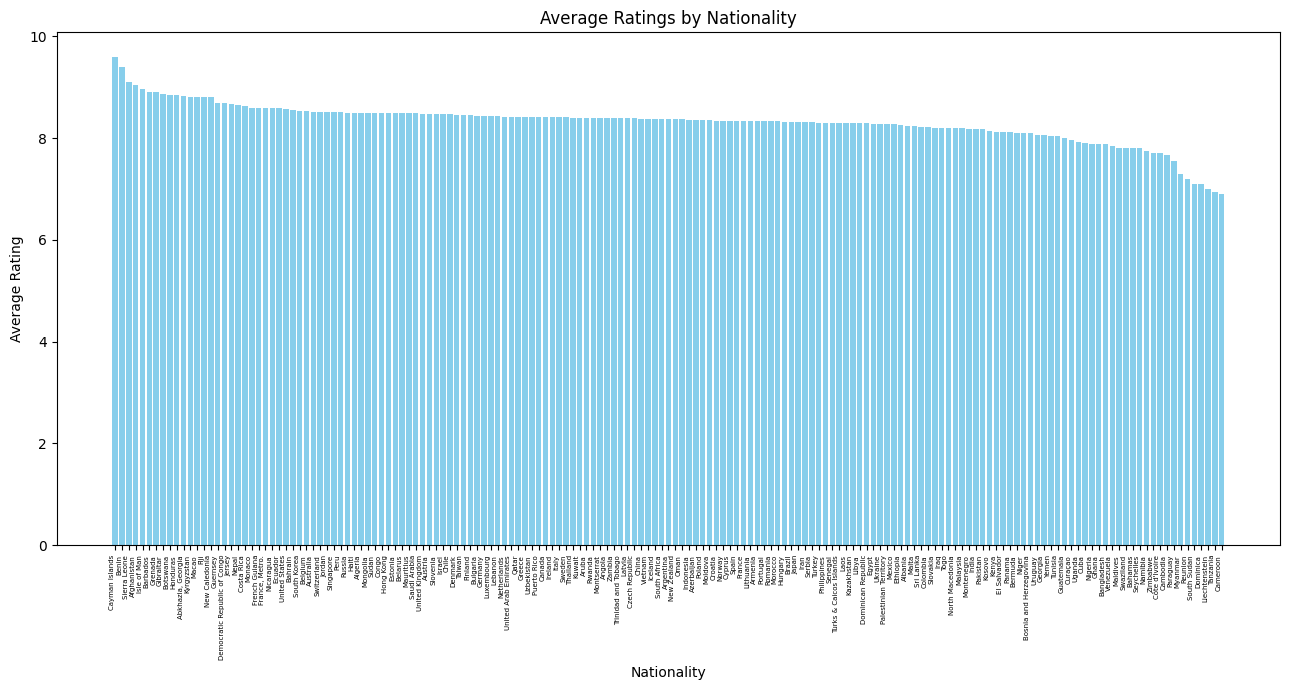

In [21]:
avg_ratings_by_nationality = df2.groupby('nationality')['avg_rating'].mean().reset_index()

# Sort the DataFrame by average ratings in descending order for better visualization
avg_ratings_by_nationality = avg_ratings_by_nationality.sort_values(by='avg_rating', ascending=False)

# Plotting the average ratings by nationality
plt.figure(figsize=(13, 7))
plt.bar(avg_ratings_by_nationality['nationality'], avg_ratings_by_nationality['avg_rating'], color='skyblue')

# Adding labels and title
plt.title('Average Ratings by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Average Rating')

# Rotate x-axis labels for better visibility
plt.tick_params(axis='x', which='major', labelsize=5)
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

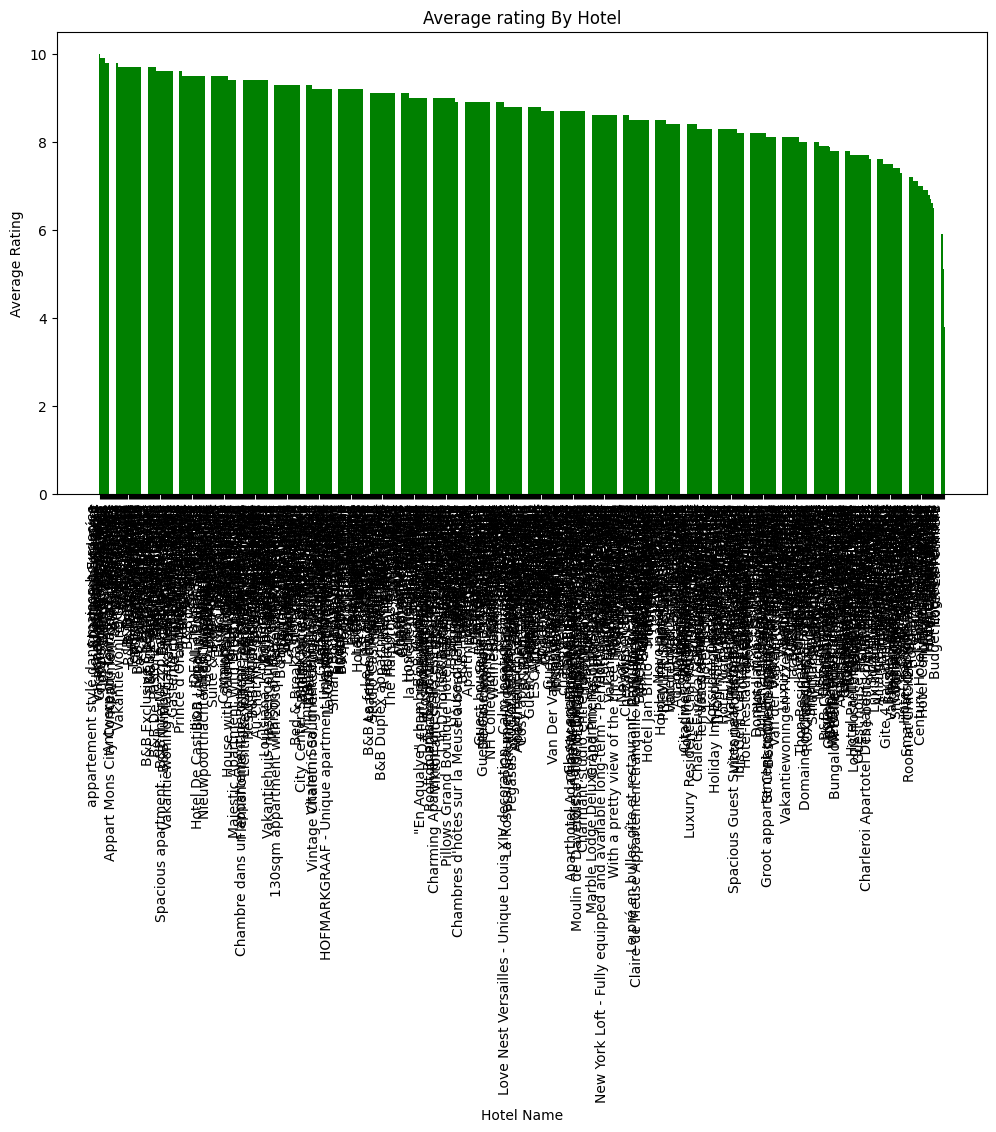

In [25]:
hotel_avg_ratings = df2.groupby(["hotel_name"])["avg_rating"].mean().reset_index()
hotel_avg_ratings = hotel_avg_ratings.sort_values(by="avg_rating", ascending=False)

plt.figure(figsize= (12, 6))
plt.bar(hotel_avg_ratings["hotel_name"], hotel_avg_ratings["avg_rating"], color="green")
plt.title("Average rating By Hotel")
plt.ylabel("Average Rating")
plt.xlabel("Hotel Name")
plt.xticks(rotation= 90, ha="right")

plt.show()


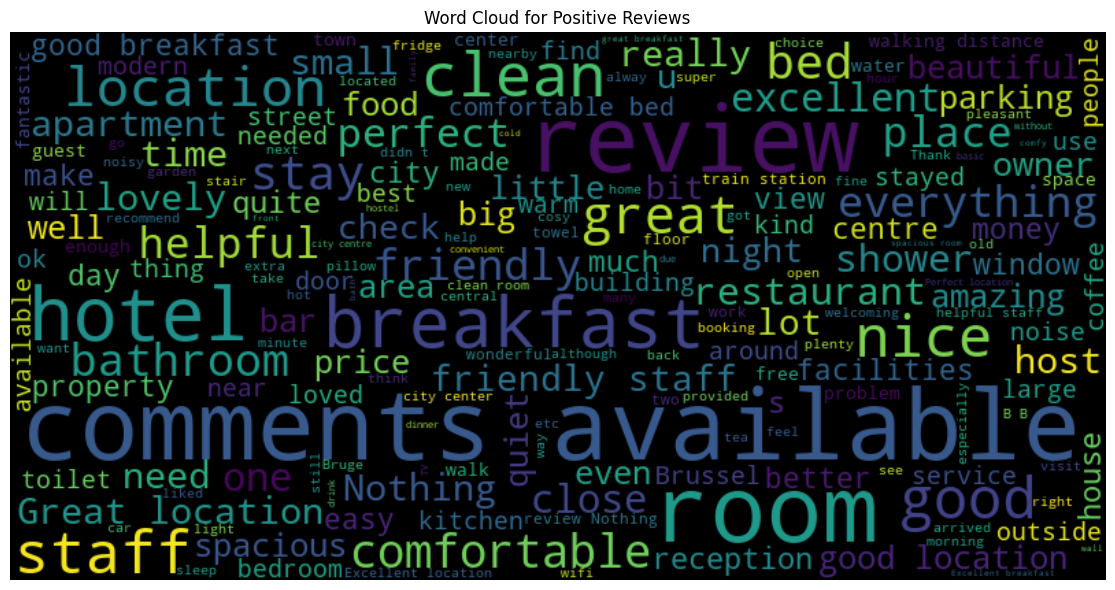

In [89]:
df2['sentiment'] = df2['sentiment'].str.lower()

# Use boolean indexing to filter positive reviews
positive_reviews = df2[df2['sentiment'] == 'positive']['review_text']

# Concatenate all positive reviews into a single string
positive_text = ' '.join(positive_reviews)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.tight_layout()
plt.show()